# Import necessary libraries and datasets

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# sklearn library imports.
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve
from yellowbrick.classifier import ClassificationReport, ROCAUC

In [38]:
# Read CSV file and make 2 copies of datasets one for EDA another for Logit model.

bank_data = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
sns.axes_style("darkgrid")
# sns.set_style("darkgrid")
# sns.set(color_codes=True)
# sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_style()
pdata = bank_data.copy()
regdata = bank_data.copy()

In [39]:
# check data shape.
pdata.shape

(5000, 14)

In [40]:
# data info, which type of data is used in column.
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [41]:
# checking null values
pdata.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [42]:
# Head
pdata.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [43]:
# After observing data, categories columns into two main categories.
categorialcolums = ["Family","Education","Securities Account","CD Account","Online","CreditCard"]
countinue_variable_colums = ["Experience","Income","ZIP Code","CCAvg","Mortgage","Age"]

In [44]:
# describe dataset.
pdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### Data does not have any null value, most of the data looks clean, However ,experience field has negative value that can not be possible, removing negative values.

In [45]:
# Lets clean data for experience since there is negative years experience, assume this is some bad data entry so take abs value.

pdata['Experience'] = pdata['Experience'].apply(lambda x:abs(x))

In [46]:
# Make sure negative value has been removed
pdata[pdata["Experience"]<0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


# Exploratory Data Analysis

In [47]:
# For EDA, Define necessary functions.

def plot_countinue_variable_colums(category,horizontal=3, verticle=2):
    figure, ax = plt.subplots(horizontal, verticle, figsize=(25, 25))
    for var, subplot in zip(category, ax.flatten()):
        sns.distplot(pdata[var], ax=subplot,bins=10, color="green")
def plot_categorial_count(category,horizontal=3, verticle=2):
    figure, ax = plt.subplots(horizontal, verticle, figsize=(25, 25))
    for cat, subplot in zip(category, ax.flatten()):
        sns.countplot(x=cat, data=pdata, ax=subplot,orient="h",edgecolor="k")
def plot_categorial_count_with_context_of_loan(category,horizontal=3, verticle=2):
    figure, ax = plt.subplots(horizontal, verticle, figsize=(25, 25))
    for cat, subplot in zip(category, ax.flatten()):
        sns.countplot(x=cat, data=pdata, ax=subplot, hue="Personal Loan",edgecolor="k")
def number_of_unique_in_each_category(countcat):
    for col in countcat:
        print(pdata[col].value_counts())
def plot_zero_morgage_count():
    pdata["Zero_morgage"] = pdata["Mortgage"] == 0
    pdata["Zero_morgage"].apply(lambda x:1 if x is True else 0)
    sns.countplot(x="Zero_morgage", data=pdata,hue="Personal Loan",edgecolor="k")
def loan_approval_analysis():
    sns.countplot(pdata["Personal Loan"])
    approved_loan = len(pdata[pdata["Personal Loan"]==1])
    rejected_load = len(pdata[pdata["Personal Loan"]==0])
    approval_percentage = ((approved_loan)/(approved_loan + rejected_load)*100)
    rejected_percentage = ((rejected_load)/(approved_loan + rejected_load)*100)
    print("Percentage people accepting loan is: {}% and percentage people did accept get loan is: {}%".format(approval_percentage,rejected_percentage))

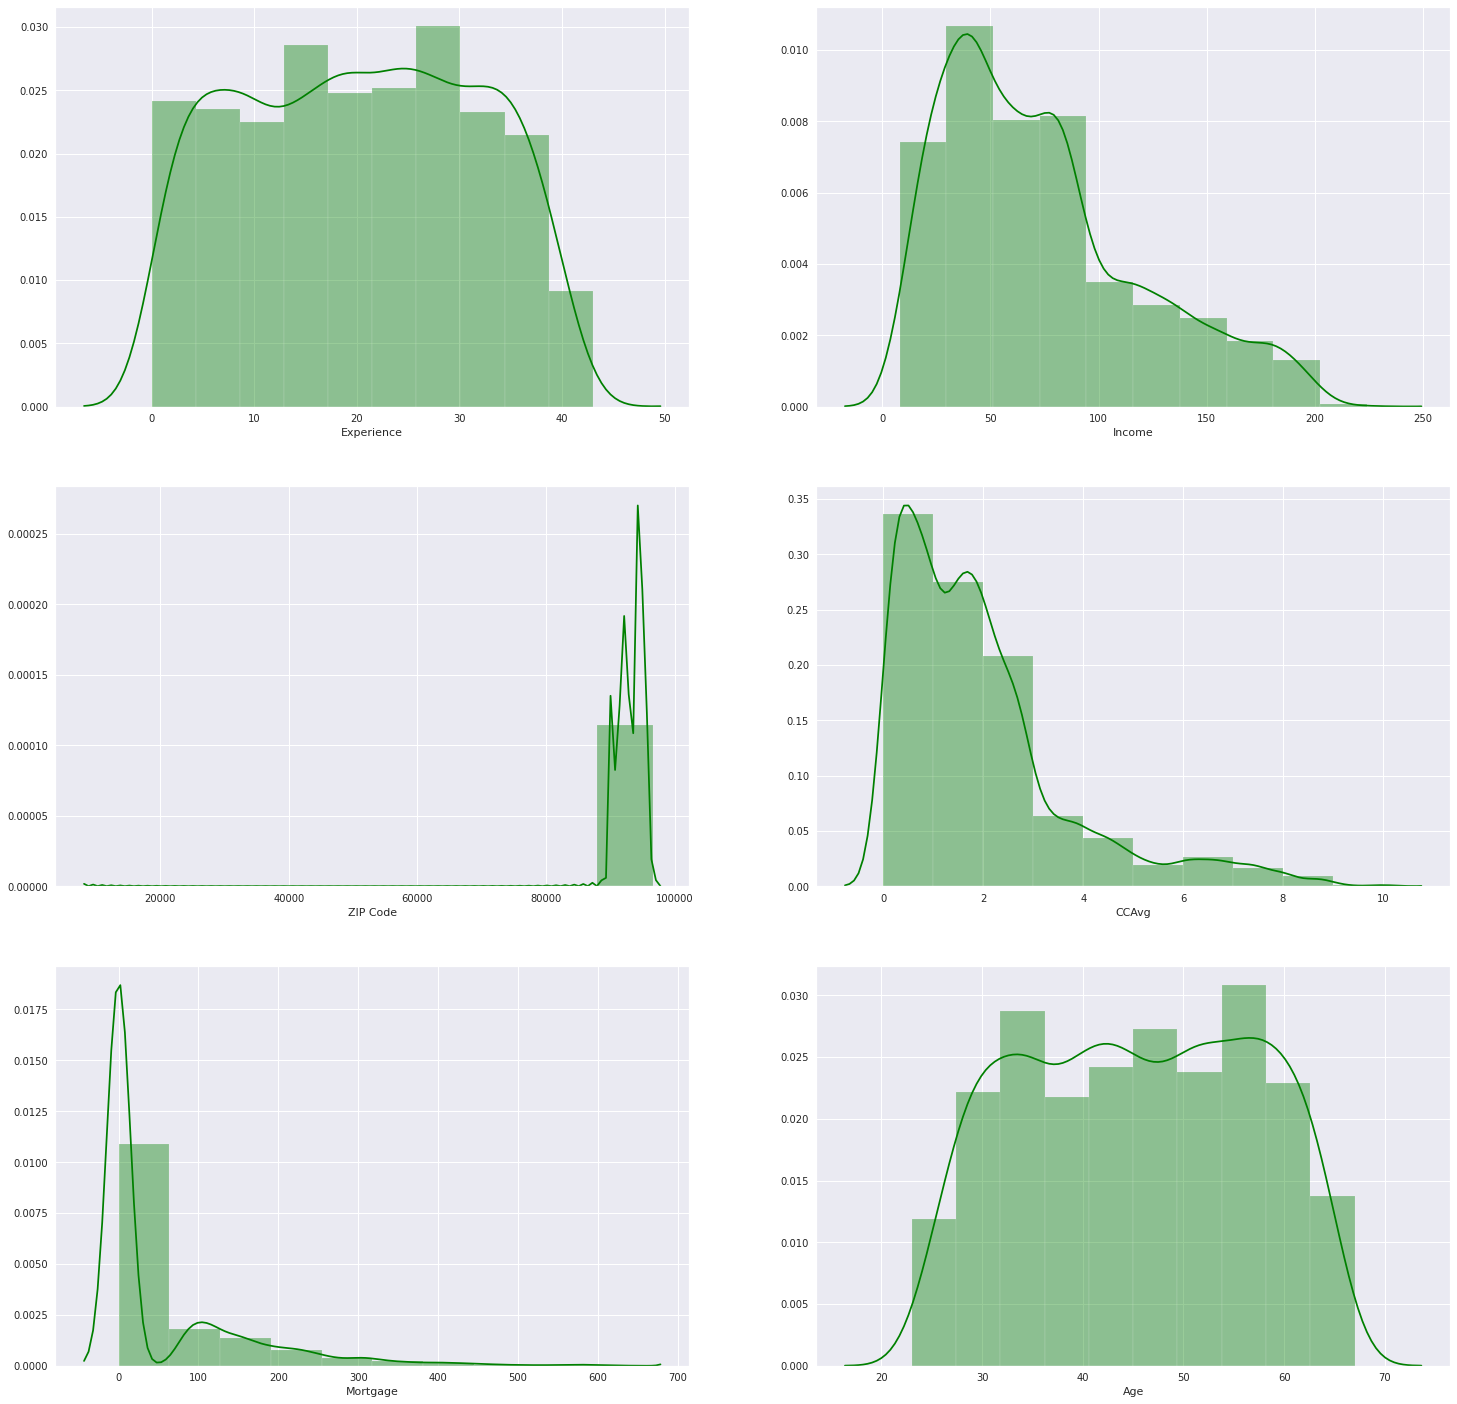

In [49]:
# Plot Countinue varible columns and its distribution.
sns.set_style("darkgrid")
plot_countinue_variable_colums(countinue_variable_colums)

Percentage people accepting loan is: 9.6% and percentage people did accept get loan is: 90.4%


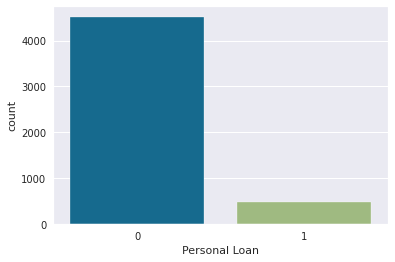

In [50]:
sns.set_style("darkgrid")
loan_approval_analysis()

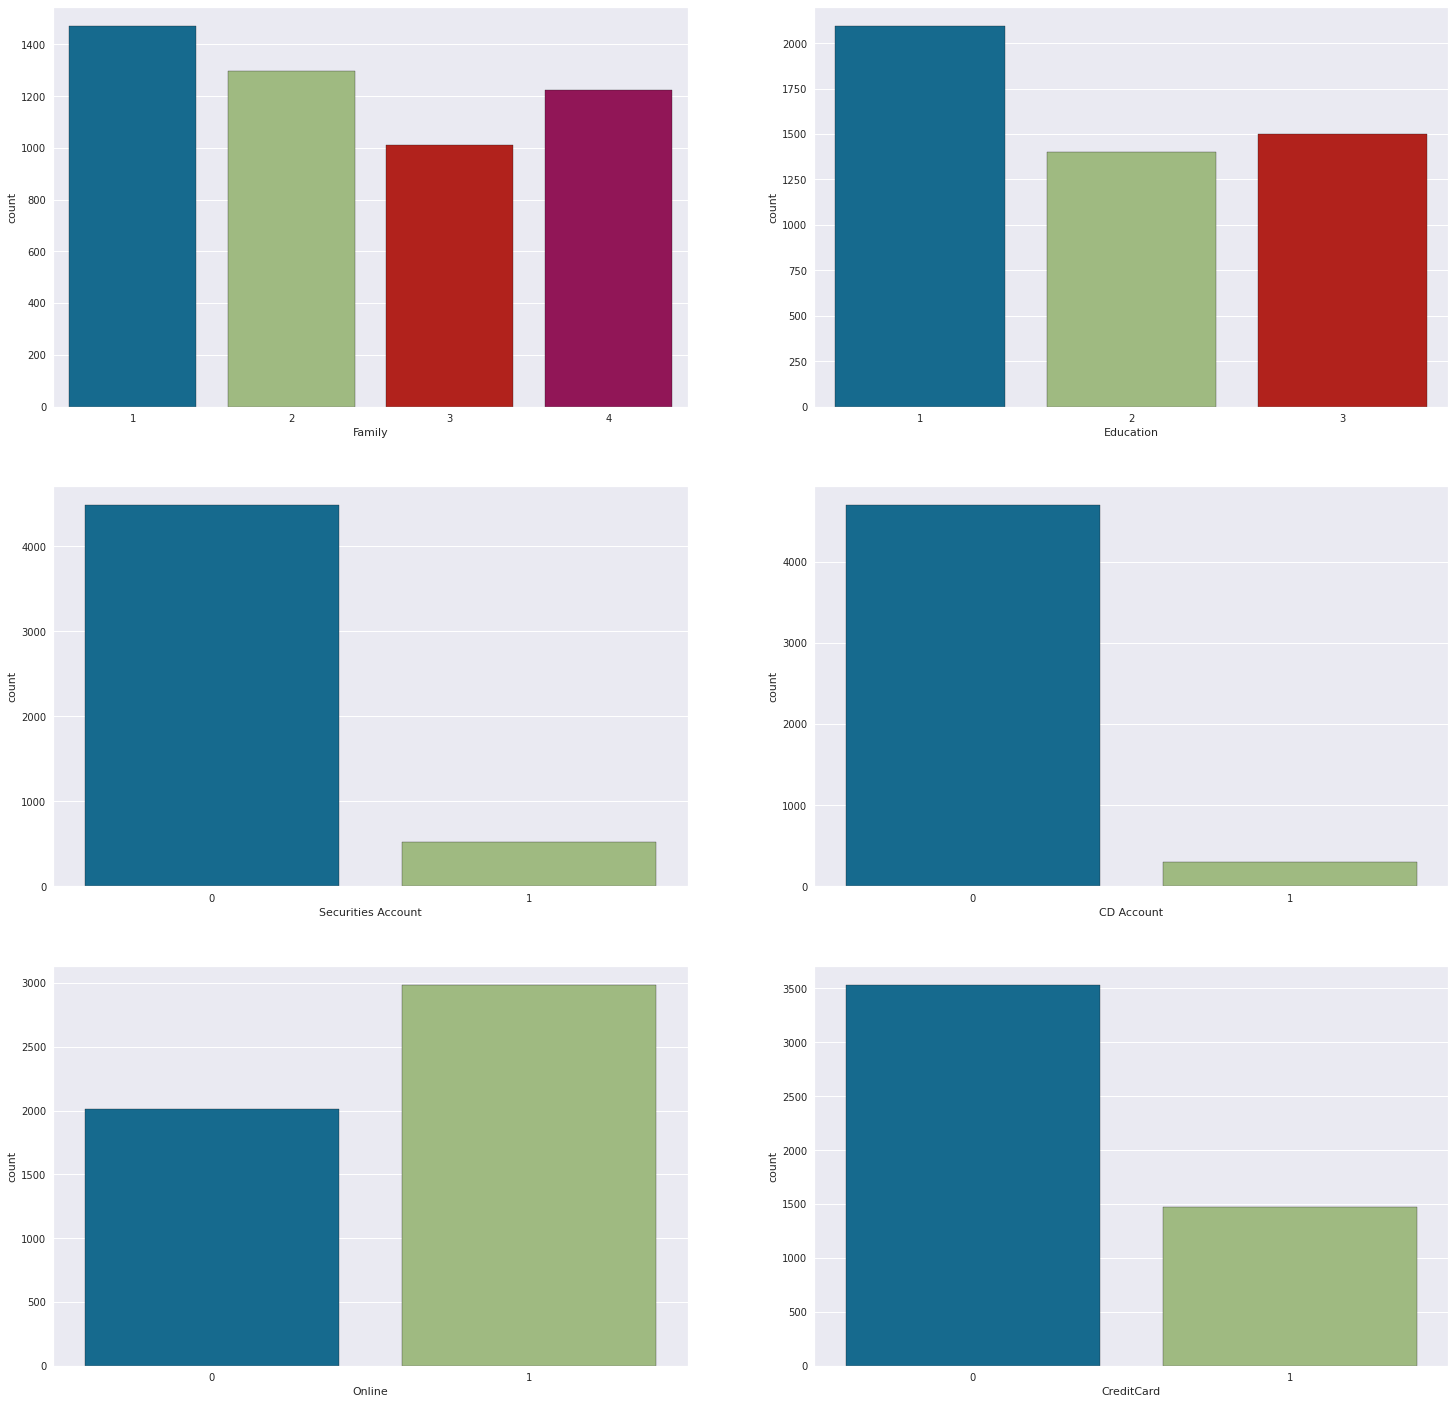

In [51]:
plot_categorial_count(categorialcolums)

In [52]:
number_of_unique_in_each_category(categorialcolums)

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
1    2096
3    1501
2    1403
Name: Education, dtype: int64
0    4478
1     522
Name: Securities Account, dtype: int64
0    4698
1     302
Name: CD Account, dtype: int64
1    2984
0    2016
Name: Online, dtype: int64
0    3530
1    1470
Name: CreditCard, dtype: int64


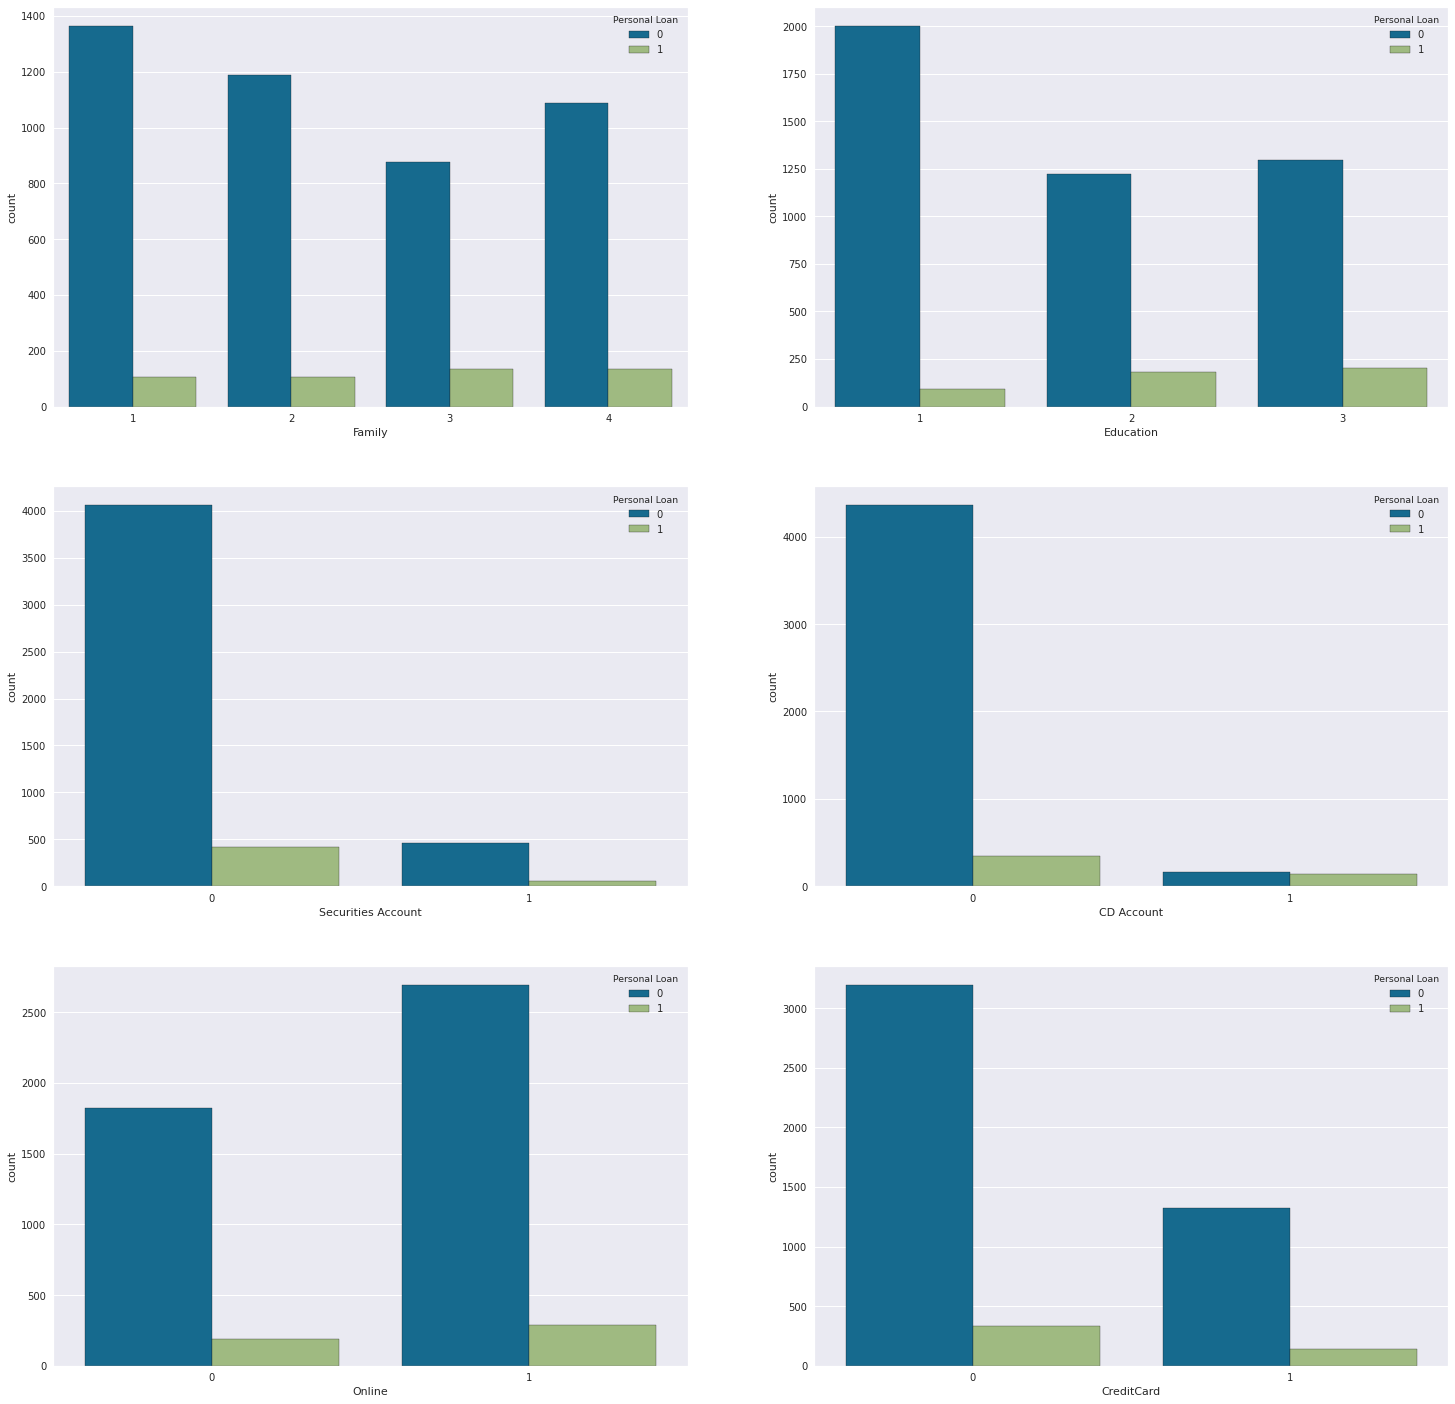

In [53]:
plot_categorial_count_with_context_of_loan(categorialcolums);

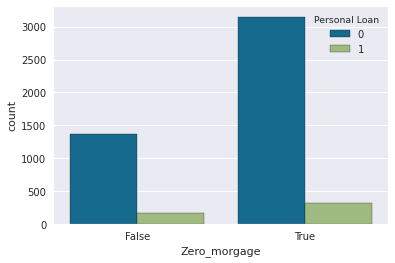

In [54]:
plot_zero_morgage_count()

In [55]:
# check variable correlation 
pdata.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Zero_morgage
ID,1.000000,-0.008473,-0.008202,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028,0.019057
Age,-0.008473,1.000000,0.993991,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681,0.009545
Experience,-0.008202,0.993991,1.000000,-0.046876,-0.028936,-0.051851,-0.049738,0.013919,-0.011097,-0.008304,-0.000989,0.009735,0.014051,0.008851,0.009075
Income,-0.017695,-0.055269,-0.046876,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385,0.003688
ZIP Code,0.013432,-0.029216,-0.028936,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691,-0.010628
Family,-0.016797,-0.046418,-0.051851,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588,-0.005037
CCAvg,-0.024675,-0.052012,-0.049738,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689,0.011398
Education,0.021463,0.041334,0.013919,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014,0.000505
Mortgage,-0.013920,-0.012539,-0.011097,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231,-0.833466
Personal Loan,-0.024801,-0.007726,-0.008304,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802,-0.029940


In [56]:
# check import variable groupby wrt personal loan.
categorical_personal_loan = pdata.groupby(["Education","Family","CD Account"])['Personal Loan'].value_counts().to_frame()

In [57]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
categorical_personal_loan

Personal Loan
Education Family CD Account Personal Loan               
1         1      0          0                        645
                            1                          4
                 1          0                         24
                            1                          5
          2      0          0                        624
                            1                          4
                 1          0                         29
          3      0          0                        292
                            1                         27
                 1          0                         17
                            1                         13
          4      0          0                        356
                            1                         26
                 1          0                         16
                            1                         14
2         1      0          0                        275
                            1                         25
                 1          1                         15
                            0                         11
          2      0          0                        209
                            1                         40
                 1          1                         10
                            0                          6
          3      0          0                        330
                            1                         29
                 1          1                         15
                            0                          9
          4      0          0                        374
                            1                         33
                 1          1                         15
                            0                          7
3         1      0          0                        398
                            1                         42
                 1          1                         16
                            0                         12
          2      0          0                        311
                            1                         41
                 1          0                         11
                            1                         11
          3      0          0                        218
                            1                         32
                 1          1                         17
                            0                         11
          4      0          0                        326
                            1                         37
                 1          0                          9
                            1                          9

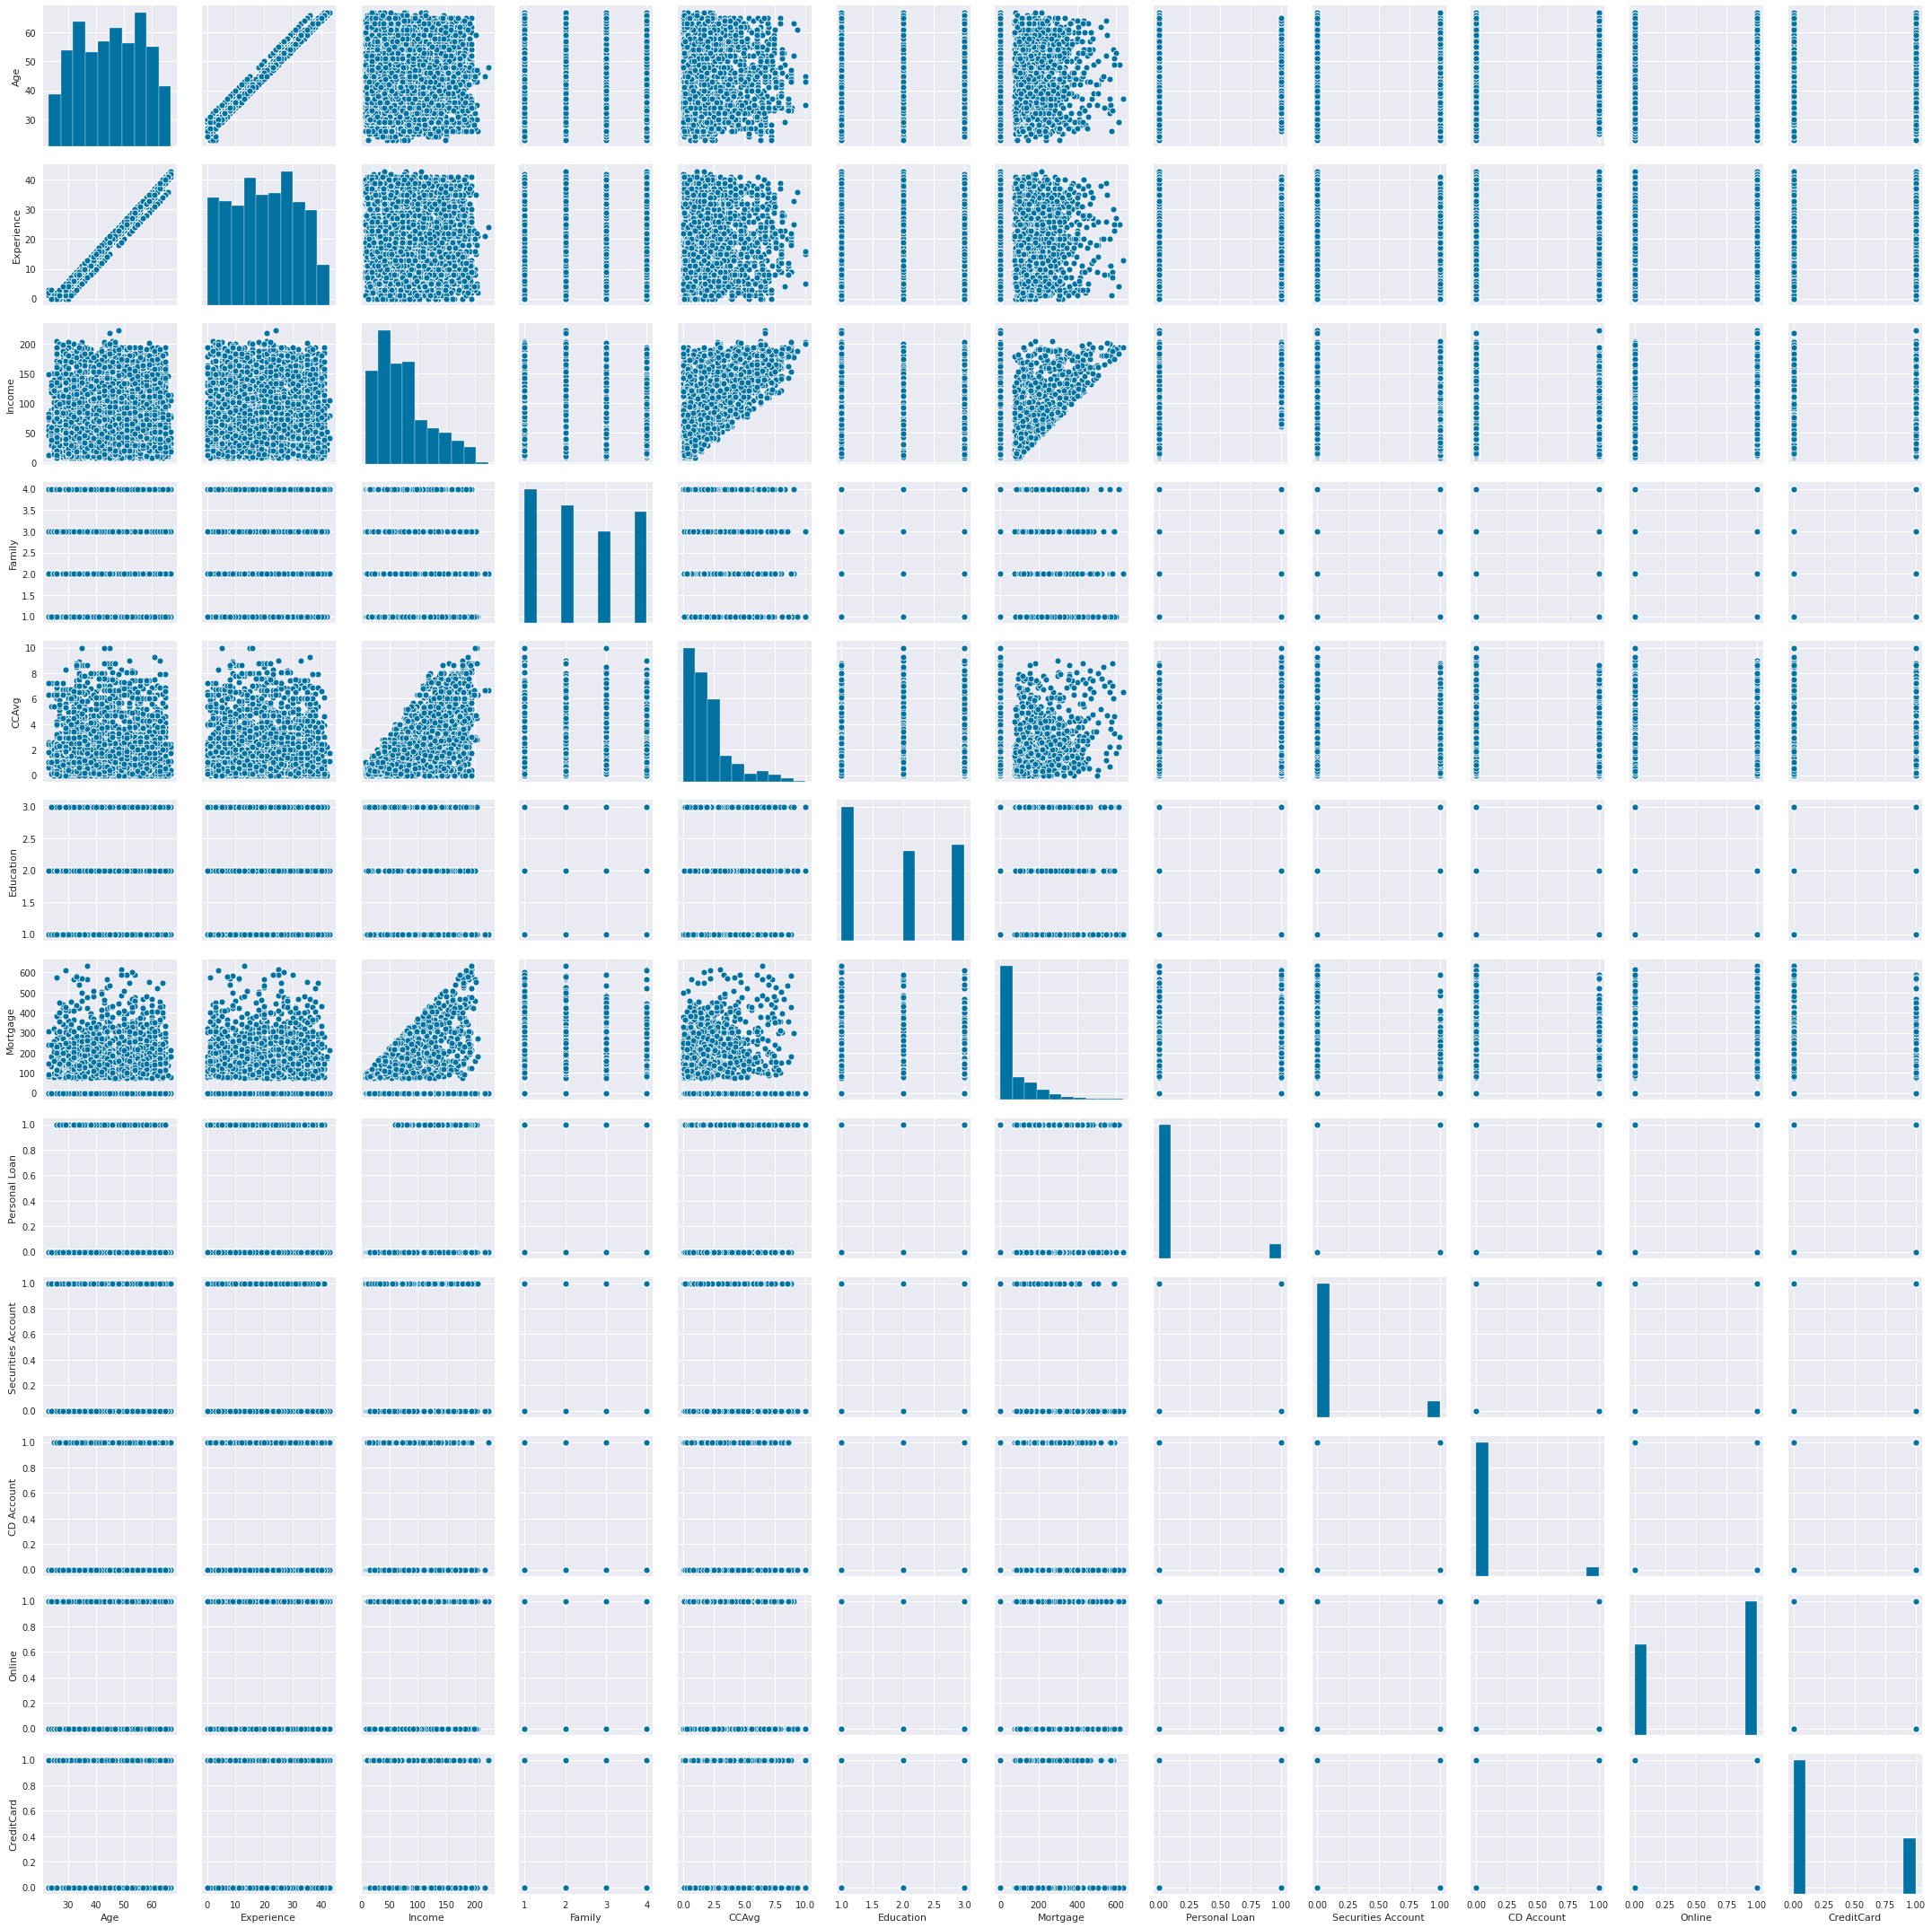

In [58]:
# Plot pairplot dataframe.Drop ID and ZIP Code since both are not so useful.
multivariant_dataframe = pdata.drop(['ID',"ZIP Code","Zero_morgage"],axis=1)
sns.pairplot(multivariant_dataframe);


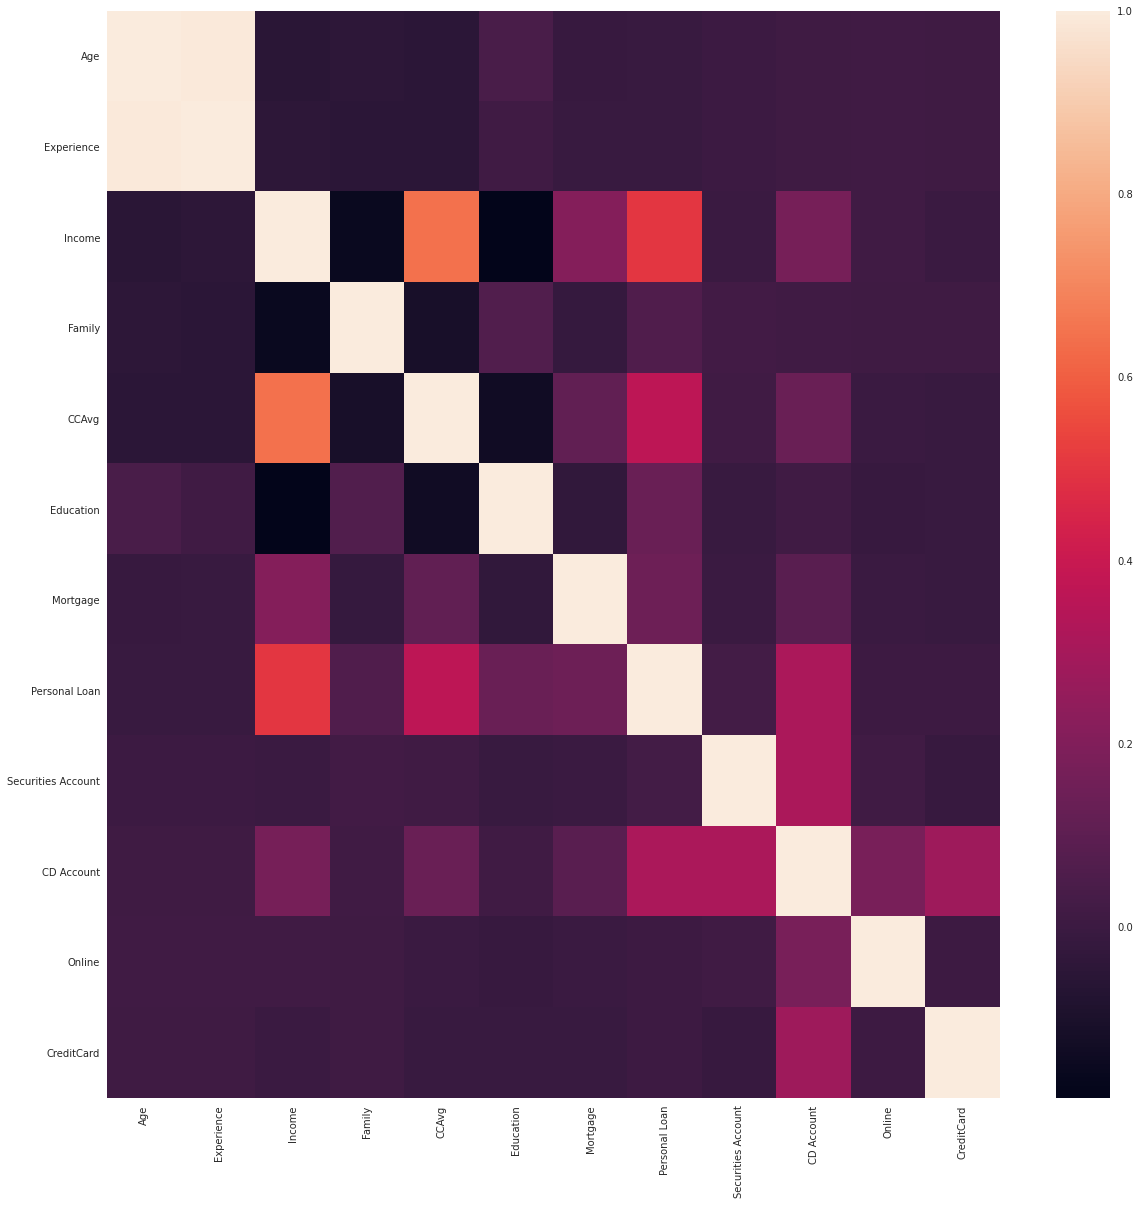

In [59]:
plt.figure(figsize=(20,20))
sns.heatmap(multivariant_dataframe.corr())

## Conclustion after Exploratory Data Analysis.
<ol>
    <li><p>for countinues variables (age,experience etc) only age and experience data is uniformally distributed.the rest or the variable either skew left or righ.t</p></li><br/>
    <li><p>zipcode and mortgage data are distributed extremly left or right.this data may not have much impact on logistic regression model.</p></li><br/>
    <li><p>Education,Family,Age,Income data is uniformaly distributed.</p></li><br/>
    <li><p>mortgage data has highest standard deviation that indicates data is distributed highly unevenly.</p></li><br/>
    <li><p>people who are acception loan is around 9% of data. 91% people are rejecting personal loan.</p></li><br/>
    <li><p>less people have CD accounts and Security accounts compare to Online account.</p></li><br/>
    <li><p>people with higher education like professional degress are accepting <b>more</b> personal loan than people with less education.</p></li><br/>
    <li><p>people with lower income are accepting <b>less</b> personal loans than people with higher income.</p></li><br/>
     <li><p>EDA also shows that people has more family members and higher education with median age are getting more personal loan.</p></li><br/>
     <li><p>Dataset does not have any null or Empty value.</p></li><br/>
     <li><p>Only Experience has some negative values that seem to be incorrect.</p></li><br/>
</ol>


### Data preparation for logistic regression 
<p>Following steps are for data preparation for logistic regression</p>

In [60]:
# Convert all continues variable  to categorical variable

regdata['Age'] = pd.cut(x=regdata['Age'], bins=[20,30,40,50,60,70], labels=[0,1,2,3,4], right=False)
regdata['CCAvg'] = pd.cut(x=regdata['CCAvg'], bins=[0,1.5,3,4.5,6,7.5,10], labels=[0,1,2,3,4,5], right=False)
regdata['Income'] = pd.cut(x=regdata['Income'], bins=[0,30,60,90,120,150,180,210,240], labels=[0,1,2,3,4,5,6,7], right=False)
regdata['Experience'] = pd.cut(x=regdata['Experience'], bins=[0,10,20,30,40,50], labels=[0,1,2,3,4], right=False)
regdata['Mortgage'] = pd.cut(x=regdata['Mortgage'], bins=[0,300,600,900], labels=[0,1,2], right=False)

In [61]:
# We are not going to use ID and ZIP CODE for out model learning.Since ZIP CODE does not have much information.
regdata = regdata.drop(['ID','ZIP Code'],axis=1)

In [62]:
# Now we can convert all our categorical data into dummies.
regdata = pd.get_dummies(regdata, columns=['Family', 'CD Account', 'Education','CreditCard',"Age","CCAvg","Income","Experience","Mortgage"])

In [63]:
# Our data is ready to feed into model
regdata.head()

,Personal Loan,Securities Account,Online,Family_1,Family_2,Family_3,Family_4,CD Account_0,CD Account_1,Education_1,Education_2,Education_3,CreditCard_0,CreditCard_1,Age_0,Age_1,Age_2,Age_3,Age_4,CCAvg_0,CCAvg_1,CCAvg_2,CCAvg_3,CCAvg_4,CCAvg_5,Income_0,Income_1,Income_2,Income_3,Income_4,Income_5,Income_6,Income_7,Experience_0,Experience_1,Experience_2,Experience_3,Experience_4,Mortgage_0,Mortgage_1,Mortgage_2
0,0,1,0,0,0,0,1,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0


## Logistic Regression
<p><b>Logistic regression model building</b></p>

In [69]:
## Drop Personal Loan column from data set and Define X,Y
X = regdata.drop('Personal Loan', axis=1)
Y = regdata[['Personal Loan']]

In [70]:
# Check column is drop from dataset.
X.head()

,Securities Account,Online,Family_1,Family_2,Family_3,Family_4,CD Account_0,CD Account_1,Education_1,Education_2,Education_3,CreditCard_0,CreditCard_1,Age_0,Age_1,Age_2,Age_3,Age_4,CCAvg_0,CCAvg_1,CCAvg_2,CCAvg_3,CCAvg_4,CCAvg_5,Income_0,Income_1,Income_2,Income_3,Income_4,Income_5,Income_6,Income_7,Experience_0,Experience_1,Experience_2,Experience_3,Experience_4,Mortgage_0,Mortgage_1,Mortgage_2
0,1,0,0,0,0,1,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
4,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0


### split data into 70:30 train test ration

In [76]:
# Define model building function with passing hyperparameters like solver,penelty and C.

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=1)
def get_logit_model(penalty="l2",lrate=0.75,solver="liblinear"):
   
    regmodel = LogisticRegression(random_state=42,penalty=penalty,C=lrate,solver=solver)
    regmodel.fit(X_train, y_train)
    return regmodel

## Find the correct hyperparams for model by compairing its test/train score

In [77]:
# Get the best model by chnaging hyperparams.first l2 solver
train_score=[]                                 
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = get_logit_model(penalty="l2",lrate=0.75,solver=i)
    y_predict = model.predict(X_test)
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))

In [78]:
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.973, 0.973, 0.973, 0.973, 0.973]

[0.969, 0.969, 0.969, 0.969, 0.969]


In [79]:
# Get the best model by chnaging hyperparams.first with penalty l1
train_score=[]                                 
test_score=[]
solver = ['liblinear','saga'] 
for i in solver:
    model = get_logit_model(penalty="l1",lrate=0.95,solver=i)
    y_predict = model.predict(X_test)
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))

In [80]:
print(solver)
print()
print(train_score)
print()
print(test_score)

['liblinear', 'saga']

[0.977, 0.977]

[0.971, 0.971]


## Conclusion: The best model is with solver "liblinear" and penelty L1 and C 0.95

In [81]:
# Now for cheking model performance, define some useful score functions.
def get_confusion_matrix( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

# function for drawing ROC curve.
def draw_roc_curve(model):
    logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

# Check model performance parameters.Like Confusion Matrix,model score on training/testing,recall,precision.
def get_models_matrix(model):
    print("Trainig accuracy",model.score(X_train,y_train))  
    print()
    print("Testing accuracy",model.score(X_test, y_test))
    print()
    print('Confusion Matrix')
    get_confusion_matrix(y_test,y_predict)
    print()
    print("Recall:",recall_score(y_test,y_predict))
    print()
    print("Precision:",precision_score(y_test,y_predict))
    print()
    print("F1 Score:",f1_score(y_test,y_predict))
    print()
    print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

In [82]:
# Get model with slected hyperparams 
model1 = get_logit_model(penalty="l1",lrate=0.95,solver="liblinear") # This is the best model.
model2 = get_logit_model(penalty="l2",lrate=0.75,solver="newton-cg") # medium performance model
model3 = get_logit_model(penalty="l2",lrate=0.25,solver="saga")      # the worst perormance model


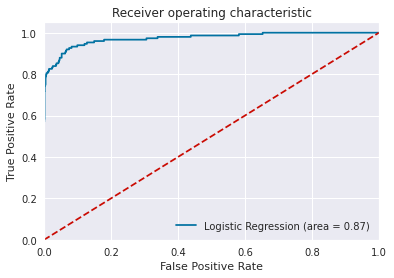

In [83]:
# check for ROC curve for model1
draw_roc_curve(model1)

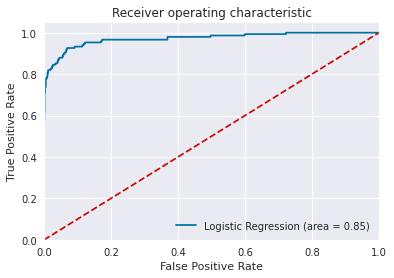

In [84]:
# check for ROC curve for model2
draw_roc_curve(model2)

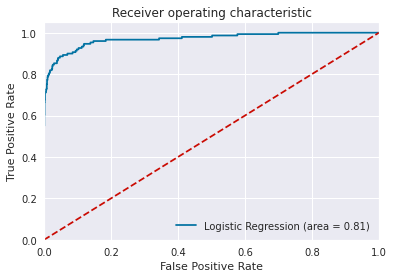

In [85]:
# check for ROC curve for model3
draw_roc_curve(model3)

### Here we can see, ROC curve area is highest for model1 which is selected by the best hyperparams.

Trainig accuracy 0.9768571428571429

Testing accuracy 0.9713333333333334

Confusion Matrix


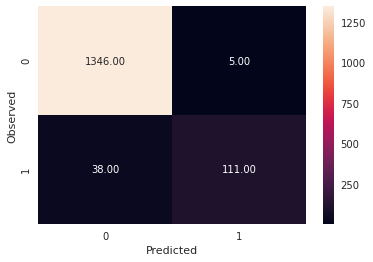


Recall: 0.7449664429530202

Precision: 0.9568965517241379

F1 Score: 0.8377358490566038

Roc Auc Score: 0.8706327403514177


In [88]:
# draw confusion matrix for the best model.
get_models_matrix(model1)

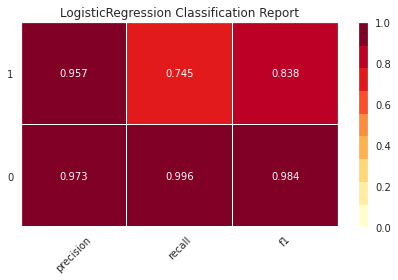

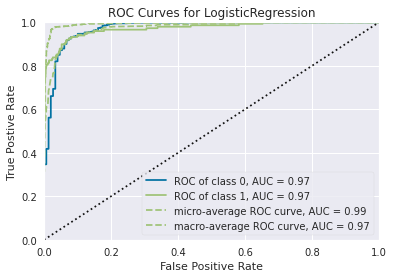

In [89]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(model1)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(model1)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

### Model performance conclusion

1) Model's training and test accuracy is pretty much closer, so there wont be any chances of overfitting/underfitting.

2) Model's Area under ROC curve is around 87% which is significantly higher than 50%. so model can be use for accurate prediction.

3) Model has relatively lower recall that can be alaraming and need to improve on it.



# Business Understanding of model

Business Understanding of model need is important aspect of the project.Here are my business understanding of my model

1) By looking at confusion matrix ( which gives false positive, false negative, true positive and true negative numbers) for test data sets.It is concluded that selecetd model is 96% precise.i.e model accurtaly predict about people who will not take a personal loan, so campaign manager can avoid those group of people and focusing people who may take a personal loan.

2)people who are not taking personal loan does not have CD account,less income, higher age and higher work experience. camapaign manager should avoid this group of people.

3) model has almost 75% recall. so 3 out 4 people who may take personal loan, can be predicted by this model 

4) people who are taking personal loan have higher education and CD Accounts with large family. campaign manager should focus this group of people.

5) In this model, recall is major factor means if peronal loan offered it should be accepted for successfull campaign.

6) Zipcode is not a significant data for this model so it can be avoided.


